# 1. 多个输入通道

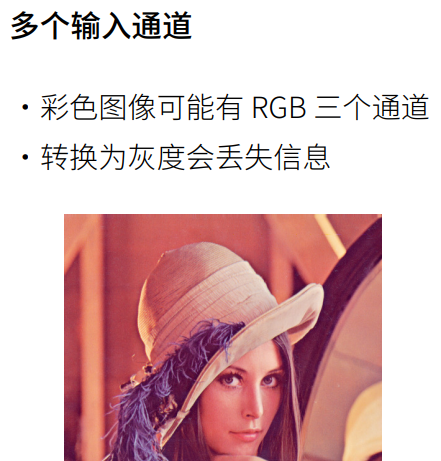

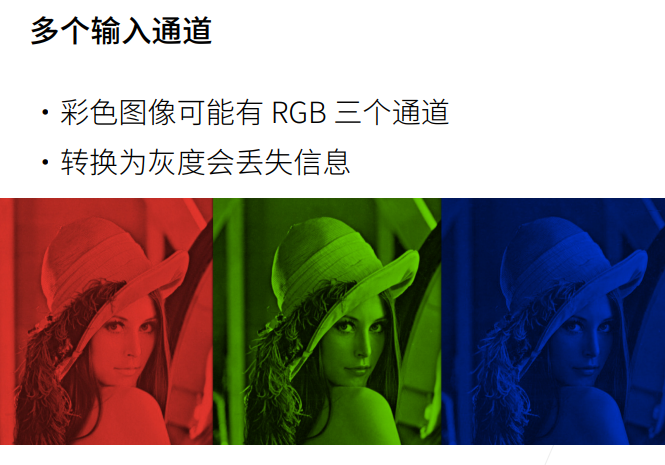

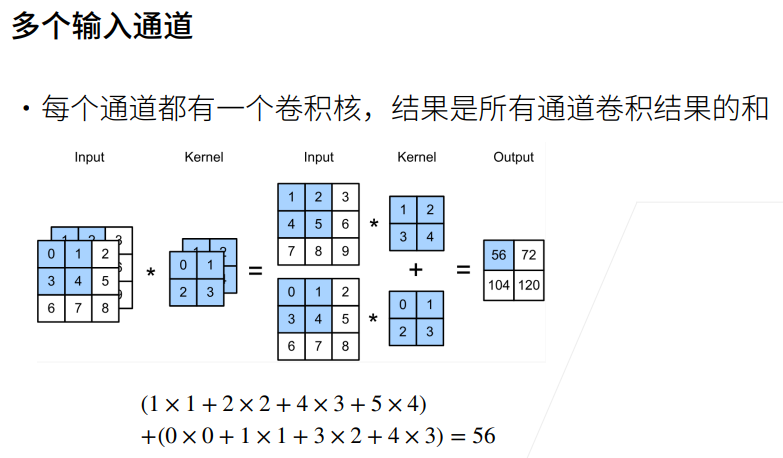

① 核的通道数与输入的通道数一样。

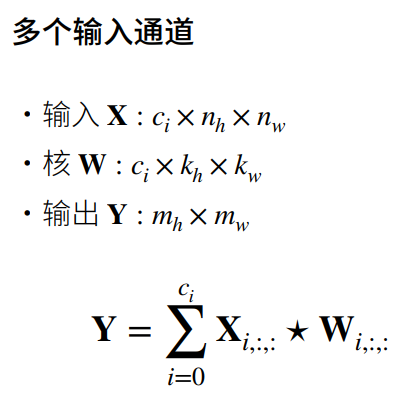

# 2. 多个输出通道

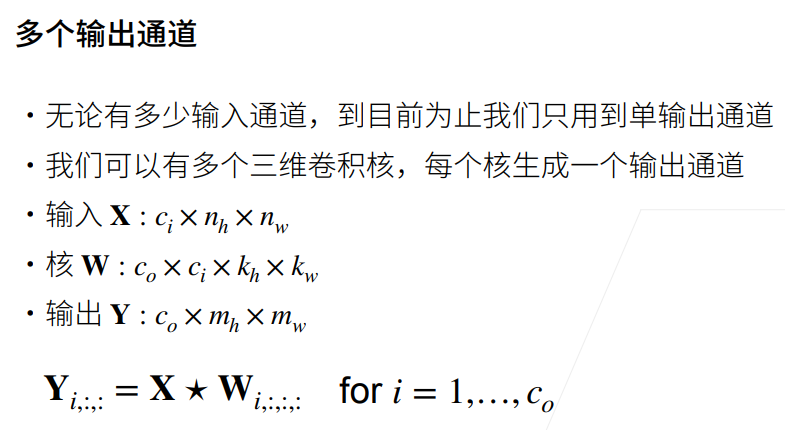

① 每个输出通道可以匹配图片里面特定的模式。

② 把每个通道里面识别出来的模式组合起来，就得到组合模式识别。

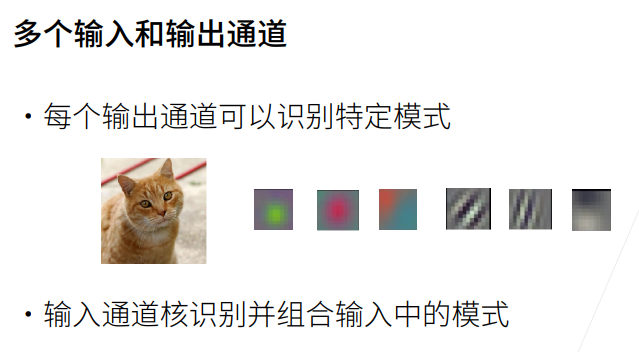

# 3. 1X1卷积层

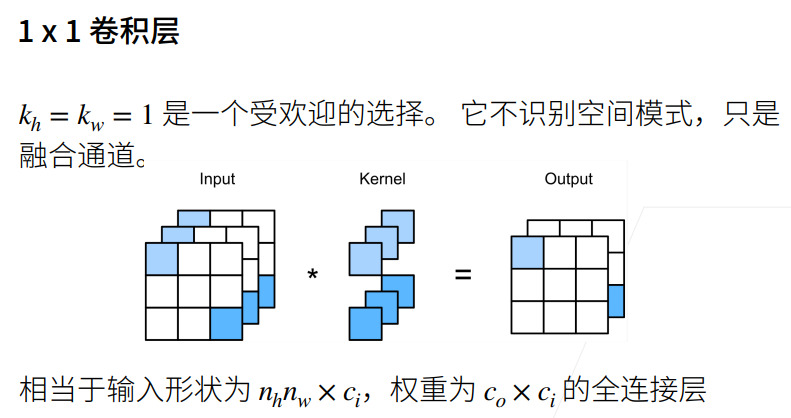

# 4. 二维卷积层

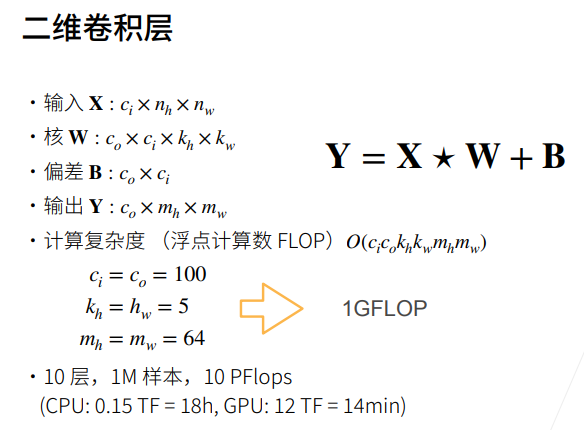

# 5. 总结

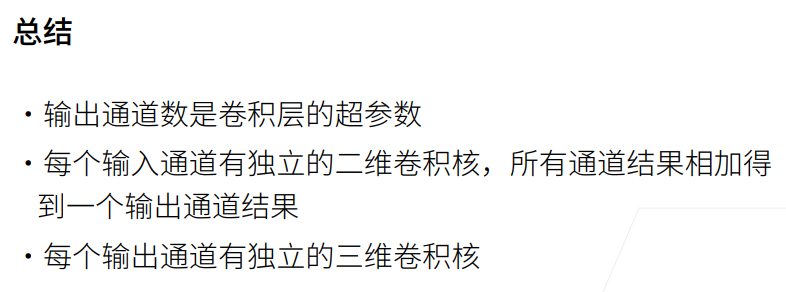

# 1. 输入与输出（使用自定义）

In [1]:
# 多输入通道互相关运算
import torch
from d2l import torch as d2l
from torch import nn

# 多通道输入运算
def corr2d_multi_in(X,K):
    return sum(d2l.corr2d(x,k) for x,k in zip(X,K)) # X,K为3通道矩阵，for使得对最外面通道进行遍历        

X = torch.tensor([[[0.0,1.0,2.0],[3.0,4.0,5.0],[6.0,7.0,8.0]],
                  [[1.0,2.0,3.0],[4.0,5.0,6.0],[7.0,8.0,9.0]]])
K = torch.tensor([[[0.0,1.0],[2.0,3.0]],[[1.0,2.0],[3.0,4.0]]])
print(corr2d_multi_in(X,K))

# 多输出通道运算
def corr2d_multi_in_out(X,K):  # X为3通道矩阵，K为4通道矩阵，最外面维为输出通道      
    return torch.stack([corr2d_multi_in(X,k) for k in K],0) # 大k中每个小k是一个3D的Tensor。0表示stack堆叠函数里面在0这个维度堆叠。           

print(K.shape)
print((K+1).shape)
print((K+2).shape)
print(K)
print(K+1)
K = torch.stack((K, K+1, K+2),0) # K与K+1之间的区别为K的每个元素加1
print(K.shape)
print(corr2d_multi_in_out(X,K))

tensor([[ 56.,  72.],
        [104., 120.]])
torch.Size([2, 2, 2])
torch.Size([2, 2, 2])
torch.Size([2, 2, 2])
tensor([[[0., 1.],
         [2., 3.]],

        [[1., 2.],
         [3., 4.]]])
tensor([[[1., 2.],
         [3., 4.]],

        [[2., 3.],
         [4., 5.]]])
torch.Size([3, 2, 2, 2])
tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]])


In [2]:
help(torch.stack)

Help on built-in function stack:

stack(...)
    stack(tensors, dim=0, *, out=None) -> Tensor
    
    Concatenates a sequence of tensors along a new dimension.
    
    All tensors need to be of the same size.
    
    Arguments:
        tensors (sequence of Tensors): sequence of tensors to concatenate
        dim (int): dimension to insert. Has to be between 0 and the number
            of dimensions of concatenated tensors (inclusive)
    
    Keyword args:
        out (Tensor, optional): the output tensor.



# 2. 1X1卷积（使用自定义）

In [3]:
# 1×1卷积的多输入、多输出通道运算
def corr2d_multi_in_out_1x1(X,K):
    c_i, h, w = X.shape # 输入的通道数、宽、高
    c_o = K.shape[0]    # 输出的通道数
    X = X.reshape((c_i, h * w)) # 拉平操作，每一行表示一个通道的特征
    K = K.reshape((c_o,c_i)) 
    Y = torch.matmul(K,X) 
    return Y.reshape((c_o, h, w))

X = torch.normal(0,1,(3,3,3))   # norm函数生成0到1之间的(3,3,3)矩阵 
K = torch.normal(0,1,(2,3,1,1)) # 输出通道是2，输入通道是3，核是1X1

Y1 = corr2d_multi_in_out_1x1(X,K)
Y2 = corr2d_multi_in_out(X,K)
assert float(torch.abs(Y1-Y2).sum()) < 1e-6
print(float(torch.abs(Y1-Y2).sum()))

0.0


# 3. 1X1卷积（使用框架）

In [4]:
def comp_conv2d(conv2d, X): # conv2d 作为传参传进去，在内部使用
    X = X.reshape((1,1)+X.shape) # 在维度前面加入一个通道数和批量大小数
    Y = conv2d(X)  # 卷积处理是一个四维的矩阵
    return Y.reshape(Y.shape[2:]) # 将前面两个维度拿掉

X = torch.rand(size=(8,8))
conv2d = nn.Conv2d(1,1,kernel_size=3,padding=1,stride=2) # Pytorch里面卷积函数的第一个参数为输出通道，第二个参数为输入通道   
print(comp_conv2d(conv2d,X).shape) 

conv2d = nn.Conv2d(1,1,kernel_size=(3,5),padding=(0,1),stride=(3,4)) # 一个稍微复杂的例子
print(comp_conv2d(conv2d,X).shape)

torch.Size([4, 4])
torch.Size([2, 2])
